#Unsupervised learning

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load your dataset (if not already loaded)
df = pd.read_csv("Dataset/processed_file.csv")

# Drop irrelevant or non-numeric columns
columns_to_drop = [
    'Unnamed: 0', 'product_href', 'product_name', 'product_type', 'brand',
    'notable_effects', 'skintype', 'description', 'picture_src', 'labels'
]
df_clean = df.drop(columns=columns_to_drop)

# Drop rows with missing values (only price_SAR had some)
df_clean = df_clean.dropna()

# Scale the features (important for clustering)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clean)

# Optionally, convert the scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=df_clean.columns)

# Preview the cleaned and scaled data
scaled_df.head()

# Save to a new CSV file
scaled_df.to_csv("Dataset/processed_for_clustering.csv", index=False)


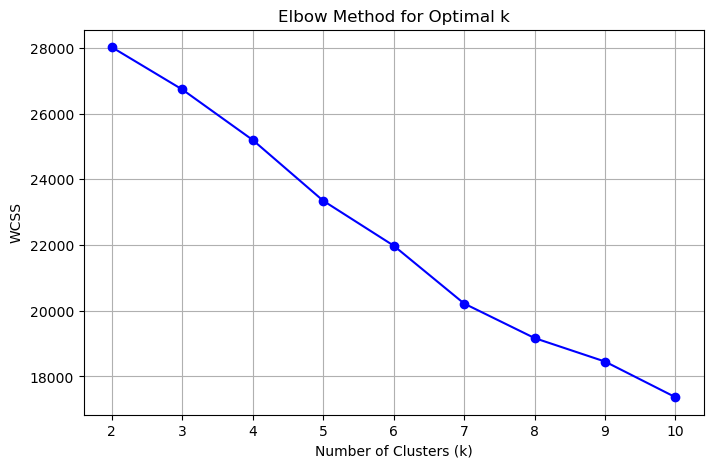

In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df.drop('Cluster', axis=1, errors='ignore'))
    wcss.append(kmeans.inertia_)  # inertia_ = WCSS

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


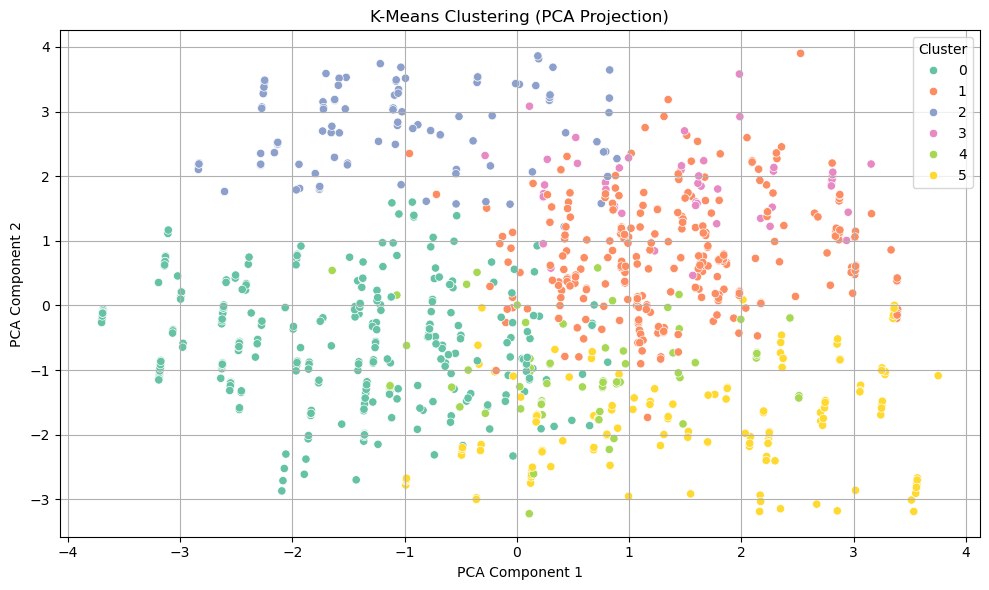

Silhouette Score: 0.1960


In [13]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Apply KMeans
kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(scaled_df)

# Step 2: Add cluster labels to the dataframe
scaled_df['Cluster'] = clusters

# Step 3: Visualize with PCA (2D)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_df.drop('Cluster', axis=1))

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=clusters, palette='Set2')
plt.title("K-Means Clustering (PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 4: Evaluate using Silhouette Score
silhouette = silhouette_score(scaled_df.drop('Cluster', axis=1), clusters)
print(f"Silhouette Score: {silhouette:.4f}")


In [14]:
# Add cluster labels to original scaled data
scaled_df['Cluster'] = clusters

# Save to CSV
scaled_df.to_csv("Dataset/clustered_data_k6.csv", index=False)


Using the Elbow Method and Silhouette Score, we determined that k=6 provides a reasonable balance between cluster compactness and interpretability for our dataset.